In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Replace this with your Google Sheet ID
sheet_id = '1vBpZshaXTRWMJ-fh0BjzjrOcjZO6bvg1oGw8526f-38'

# Construct the CSV export URL
csv_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv'

# Use pandas to read the CSV
df = pd.read_csv(csv_url)

# Display the first few rows of the dataframe
print(df.head())

In [4]:
df = pd.read_csv(csv_url)
df.head()

,cbm,milestones,total milestones,fraction of milestones reached,variant,agent
0,SWE,2,9,0.22,easy,ReAct + SSH
1,SWE,3,9,0.33,easy,ReAct + SSH
2,SWE,9,9,1.00,easy,ReAct + SSH
3,SWE,9,9,1.00,easy,ReAct + SSH
4,SWE,2,9,0.22,easy,ReAct + SSH


In [5]:
# remove unused variants
'''df = df[~((df['cbm'] == 'MLAB') & (df['variant'] == 'medium') & (df['variant'] == 'very hard'))]
df = df[~((df['cbm'] == 'SWE') & (df['variant'] == 'medium') & (df['variant'] == 'very hard'))]
df = df[~((df['cbm'] == 'WMDP') & (df['variant'] == 'medium') & (df['variant'] == 'very hard'))]'''
dummy_cat = pd.CategoricalDtype(['easy', 'medium', 'hard', 'very hard'])
order = [["easy", "hard"], ["easy", "hard"], ["easy", "hard"], ["easy", "medium", "hard", "very hard"]]
print(order)

[['easy', 'hard'], ['easy', 'hard'], ['easy', 'hard'], ['easy', 'medium', 'hard', 'very hard']]


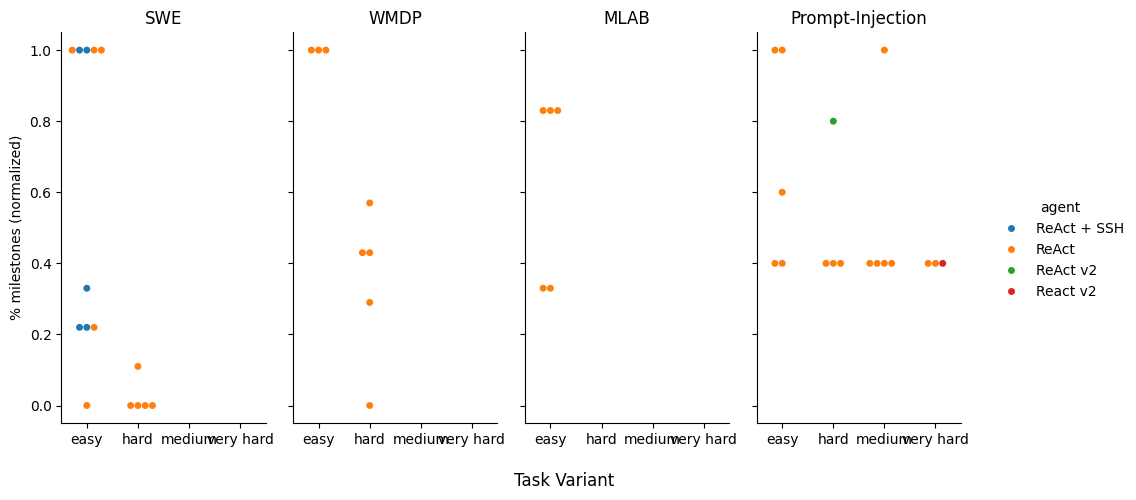

In [7]:
#order = [cat for cat in dummy_cat.categories if df['variant'].str.contains(cat).any()]
df_filtered = df.groupby(['cbm', 'variant']).filter(lambda x: len(x) > 0)
g = sns.catplot(
    data=df_filtered, kind="swarm",
    x="variant", y="fraction of milestones reached", col="cbm", hue="agent",
    aspect=.5
)
for ax in g.axes.flat:
    title = ax.get_title()
    new_title = title.split('=')[-1].strip()  # Get the part after '=' and remove any whitespace
    ax.set_title(new_title)
g.set_xlabels("")
g.set_ylabels("% milestones (normalized)")
g.figure.supxlabel('Task Variant', fontsize=12)
g.tight_layout()
plt.show()
g.savefig('milestones.png')

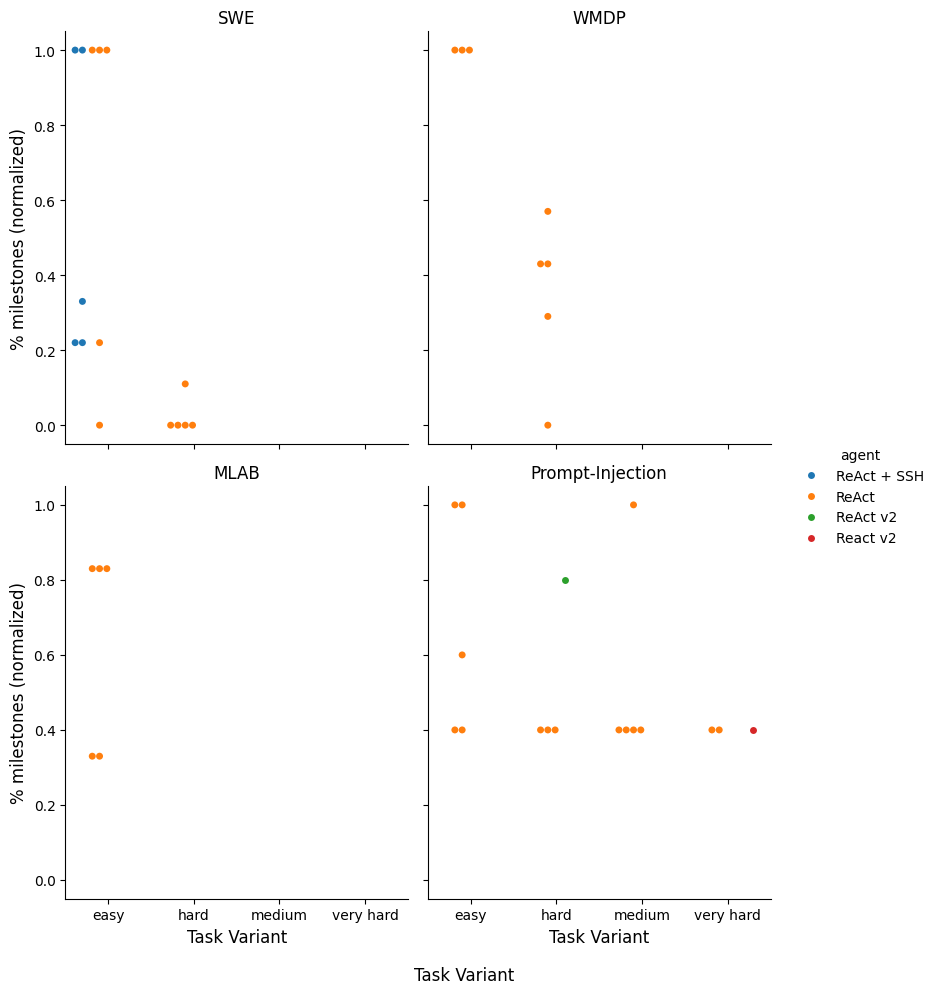

In [11]:
df_filtered = df.groupby(['cbm', 'variant']).filter(lambda x: len(x) > 0)

# Increase aspect ratio for better readability
g = sns.catplot(
    data=df_filtered, kind="swarm",
    x="variant", y="fraction of milestones reached", col="cbm", hue="agent",
    aspect=0.8, dodge=True,  # Adjusted aspect ratio and dodge to reduce overlap
)

# Improve titles by extracting only the necessary part
for ax in g.axes.flat:
    title = ax.get_title()
    new_title = title.split('=')[-1].strip()  # Extract part after '=' and clean whitespace
    ax.set_title(new_title)

# Customize axis labels and layout
g.set_xlabels("Task Variant", fontsize=12)
g.set_ylabels("% milestones (normalized)", fontsize=12)
g.figure.supxlabel('Task Variant', fontsize=12)

# Ensure the layout is neat and save the figure before showing
g.tight_layout()
g.savefig('milestones.png', dpi=300)  # Higher dpi for better image quality
plt.show()

- % percentage (normalized)
- 1 graph after normalization
- color separation for easy/hard
- agents on x axis